In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\Users\\Hp\\Desktop\\python-kickstart\\FuelConsumptionCo2.csv")

In [6]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
873,2014,PORSCHE,911 CARRERA 4S CABRIOLET,MINICOMPACT,3.8,6,AM7,Z,12.7,9.0,11.0,26,253
570,2014,JEEP,CHEROKEE,SUV - SMALL,3.2,6,A9,X,12.3,8.3,10.5,27,242
341,2014,FIAT,500L TURBO,STATION WAGON - SMALL,1.4,4,M6,X,9.3,7.2,8.4,34,193
228,2014,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.2,20.5,25.8,11,413
583,2014,JEEP,COMPASS 4X4 TRAIL RATED,SUV - SMALL,2.4,4,AV,X,11.7,10.3,11.1,25,255


In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [14]:
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
504,2.0,4,8.6,198
101,3.0,6,10.1,232
303,3.6,6,10.3,237
196,6.2,8,11.2,258
1041,2.0,4,6.9,186
1005,5.7,8,15.5,356
27,3.0,6,8.3,224
432,3.6,6,12.3,283
121,4.4,8,13.8,317


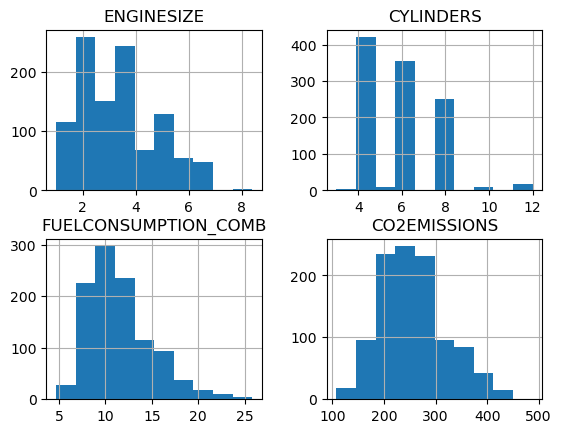

In [16]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

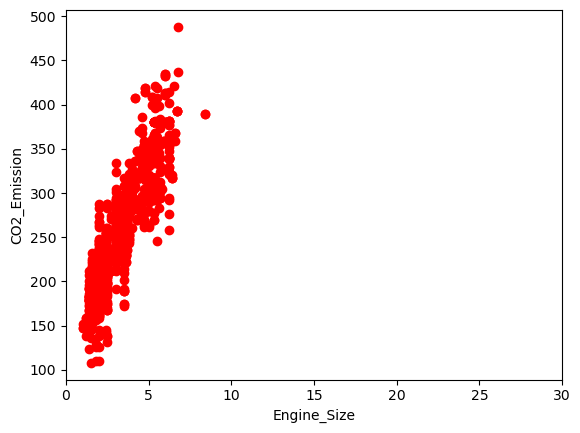

In [28]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel("Engine_Size")
plt.ylabel("CO2_Emission")
plt.xlim(0,30)
plt.show()

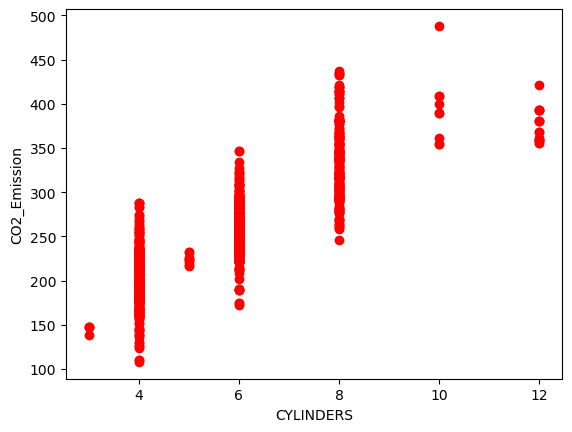

In [30]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2_Emission")
plt.show()

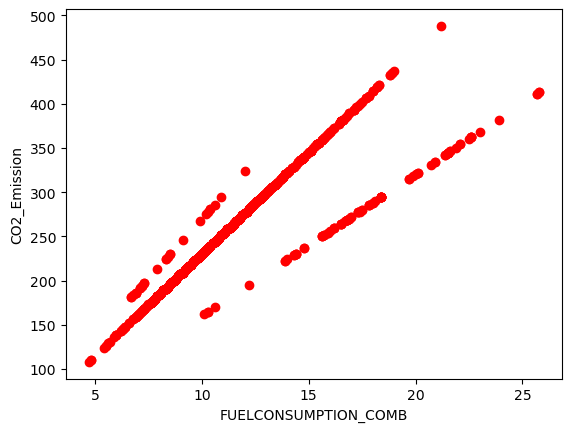

In [32]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2_Emission")
plt.show()

In [40]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
X_train.shape

(853,)

In [50]:
X_test.shape

(214,)

In [52]:
y_train.shape

(853,)

In [54]:
y_test.shape

(214,)

In [64]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1,1),y_train)
print('Coifficients:',regressor.coef_[0])
print('Intercept:',regressor.intercept_)

Coifficients: 38.992978724434046
Intercept: 126.2897021740873


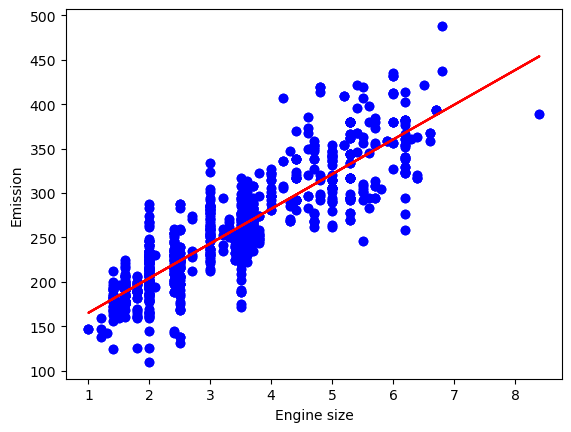

In [68]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


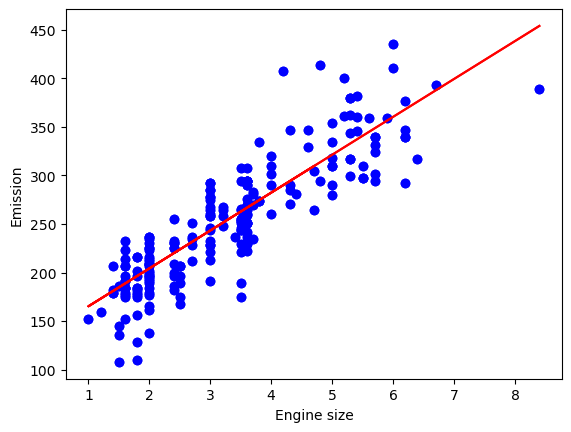

In [76]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()